# Exercise 2: Part C

This exercise relates to the *Carseats* data set which can be found in `../datasets/Carseats.csv` file as a _csv_ file.

It contains _simulated_ data of child car seats from 400 different stores.


The variables are:

* `Sales`: Unit sales (in thousands)
* `CompPrice`: Number of cylinders; between 4 and 8
* `Income`: Price charged by competitor (in thousands of dollars)
* `Advertising`: Local advertising budget for company at each location (in thousands of dollars)
* `Population`: Population size in region (in thousands)
* `Price`: Price company charges for car seats at each site
* `ShelveLoc`: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* `Age`: Average age of the local population
* `Education`: Education level at each location
* `Urban`: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* `US`: A factor with levels No and Yes to indicate whether the store is in the US or not

Look at the data with _Excel_ or _LibreOffice Calc_, or a generic text editor (_Sublime Text_, _vim_, _notepadpp_, …)

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [3]:
def task3_data():
    df = pd.read_csv("../data/Carseats.csv", index_col=0)
    df = df.reset_index()
    df = df.loc[:, ["Sales", "Price", "Urban", "US"]]
    df["Urban"] = df["Urban"].apply(lambda x: {"Yes": 1, "No": 0}[x])
    df["US"] = df["US"].apply(lambda x: {"Yes": 1, "No": 0}[x])
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors="coerce")
    df = df.dropna()
    return df

task3_data().describe()

,Sales,Price,Urban,US
count,400.000000,400.000000,400.000000,400.000000
mean,7.496325,115.795000,0.705000,0.645000
std,2.824115,23.676664,0.456614,0.479113
min,0.000000,24.000000,0.000000,0.000000
25%,5.390000,100.000000,0.000000,0.000000
50%,7.490000,117.000000,1.000000,1.000000
75%,9.320000,131.000000,1.000000,1.000000
max,16.270000,191.000000,1.000000,1.000000


## Task C1: Multiple Linear Regression

Fit a multiple regression model to predict Sales using Price, Urban, and US.

Fit the model [using R-style formulas](https://www.statsmodels.org/dev/example_formulas.html).

Consider the following questions:

- i. What are possible interpretations of each coefficient?
- ii. For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?

In [4]:
est = smf.ols(formula='Sales ~ Price + Urban + US', data=task3_data()).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.39e-23
Time:                        12:54:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>The null hypothesis can be rejected for the US predictor</strong>

## Task C2: Multiple Linear Regression

Fit a multiple regression model using only the predictors for which you can reject the null hypothesis in the previous task.

Fit the model [using R-style formulas](https://www.statsmodels.org/dev/example_formulas.html).

Consider the following questions:

- i. How well do the two models fit the data? Which model is better?
- ii. What are the confidence intervals for the predictors?

In [5]:
lm = smf.ols(formula='Sales ~ US + Price', data=task3_data()).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.66e-24
Time:                        12:54:12   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US             1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>i) Both model dont fit the data well, the first one does slightly better<br>ii) The 95% confidence interval is [0.472 1.616] for the US predictor</strong>

The following cells provide convenience functions to visualize possibly interesting properties / metrics for your fitted model(s).

In [22]:
def check_linearity_assumption(ax, fitted_y, residuals):
    sns.residplot(
        x=fitted_y,
        y=residuals,
        lowess=True,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
        ax=ax,
    )
    ax.set_title("Residuals vs Fitted")
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("Residuals")


def check_residual_normality(ax, residuals_normalized):
    qq = ProbPlot(residuals_normalized)
    qq.qqplot(line="45", alpha=0.5, lw=1, ax=ax)
    ax.set_title("Normal Q-Q")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Standardized Residuals")


def check_homoscedacticity(ax, fitted_y, residuals_norm_abs_sqrt):
    plot_3 = plt.figure()
    ax.scatter(fitted_y, residuals_norm_abs_sqrt, alpha=0.5)
    sns.regplot(
        x=fitted_y,
        y=residuals_norm_abs_sqrt,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
        ax=ax,
    )
    ax.set_title("Scale-Location")
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("$\\sqrt{|Standardized Residuals|}$")


def check_influcence(ax, leverage, cooks, residuals_normalized):
    ax.scatter(leverage, residuals_normalized, alpha=0.5)
    sns.regplot(
        x=leverage,
        y=residuals_normalized,
        scatter=False,
        ci=False,
        lowess=True,
        line_kws={"color": "red", "lw": 1, "alpha": 0.8},
        ax=ax,
    )
    ax.set_xlim(0, max(leverage) + 0.01)
    ax.set_ylim(-3, 5)
    ax.set_title("Residuals vs Leverage")
    ax.set_xlabel("Leverage")
    ax.set_ylabel("Standardized Residuals")


def summary_plots(lm, title=""):
    fitted_y = lm.fittedvalues
    residuals = lm.resid
    residuals_normalized = lm.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals_normalized))
    leverage = lm.get_influence().hat_matrix_diag
    cooks = lm.get_influence().cooks_distance[0]

    fig, axs = plt.subplots(2, 2)
    check_linearity_assumption(axs[0, 0], fitted_y, residuals)
    check_residual_normality(axs[0, 1], residuals_normalized)
    check_homoscedacticity(axs[1, 0], fitted_y, model_norm_residuals_abs_sqrt)
    check_influcence(axs[1, 1], leverage, cooks, residuals_normalized)

    fig.suptitle(title)

    plt.show()


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


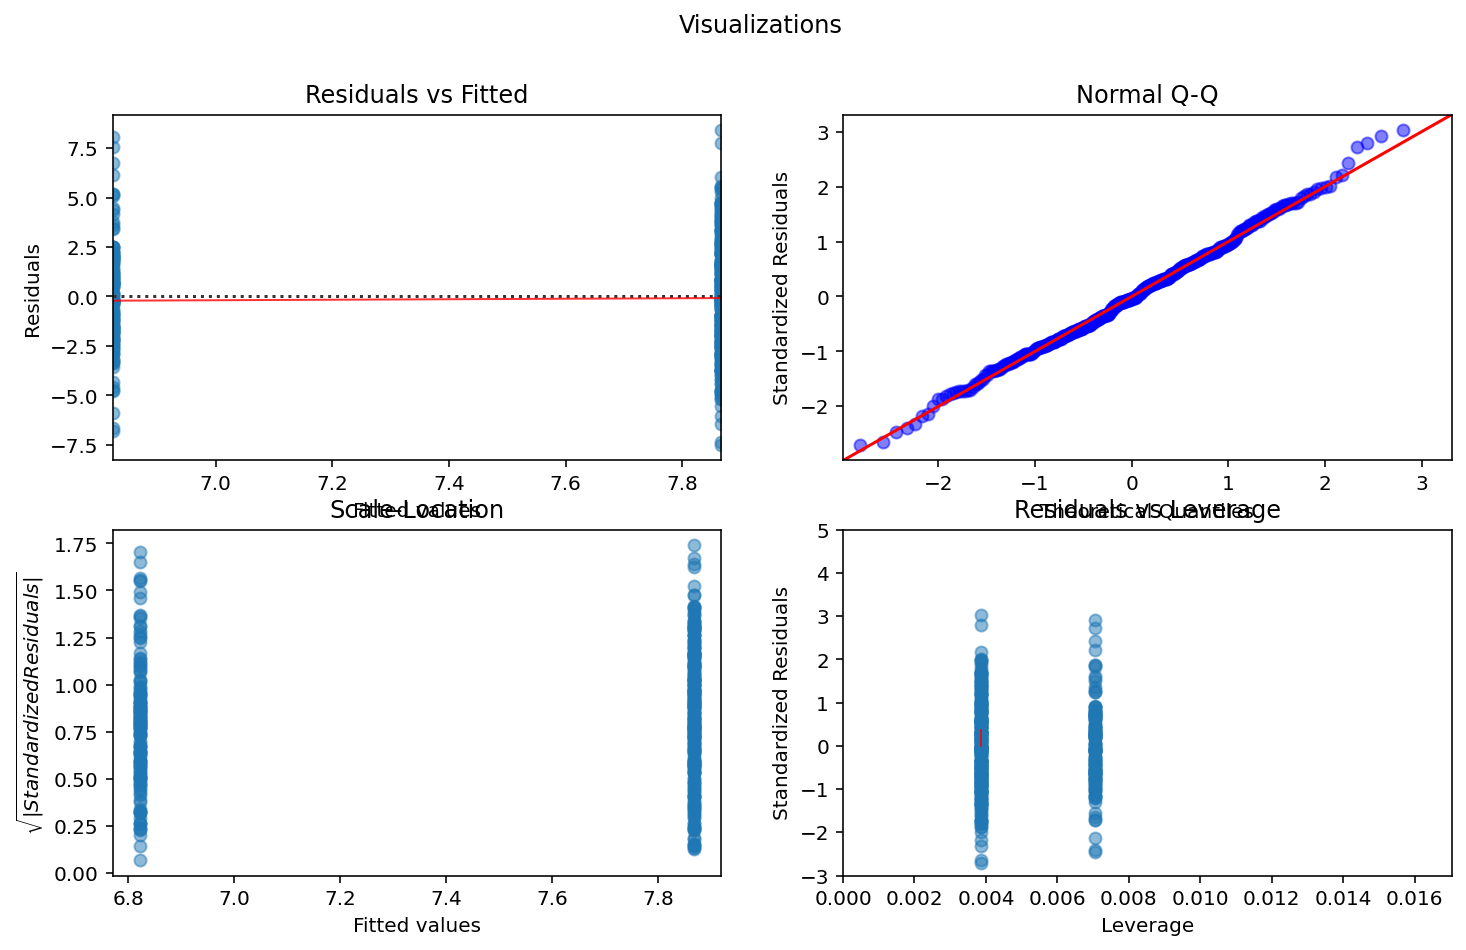

<Figure size 864x504 with 0 Axes>

In [27]:
summary_plots(lm, title="Visualizations")